In [ ]:
import numpy as np
import pandas as pd

# Load just 20000 rows - the entire input data is massive!
df = pd.read_csv('Datasets/train_data_QUICK_START.csv')
df.head()

,sequence_id,sequence,experiment_type,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,DasLabBigLib_OneMil_Replicates_from_previous_l...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Take only most frequent bases (n=177)

In [ ]:
# Add new column which holds sequence len

sequence_len = df['sequence'].apply(lambda x: len(x))
df.insert (3, "sequence_len", sequence_len)


In [ ]:
df.head()

,sequence_id,sequence,experiment_type,sequence_len,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,177,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,177,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,177,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,177,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,177,DasLabBigLib_OneMil_Replicates_from_previous_l...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_177 = df[df["sequence_len"] == 177]

In [ ]:
df_177.shape

(294788, 417)

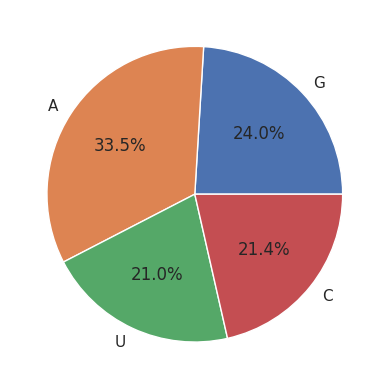

In [ ]:
# Let's take a look at the data, shall we?
# Don't worry about understanding this code - it's just generally helpful to visualize your data when
# starting a Kaggle competition.
import collections
import seaborn as sns
import matplotlib.pyplot as plt

char_frequencies = [sum(df_177["sequence"].apply(lambda x: x.count(char))) for char in ['G','A','U','C']]

sns.set_theme()
plt.pie(char_frequencies, labels = ['G','A','U','C'], autopct='%1.1f%%')
plt.show()

To understand what we have here, we actually have **timeseries data.**
### For each sequence of mRNA, we want to predict its reactivity at each position:

```
    C        A        U         G        A    ...
  0.61     0.42     0.01      0.19     0.99   ...
```

Our data is formatted with many columns, but only a few of them are informative.
### In fact, we only have one piece of data to condition our prediction on:
1. The mRNA sequence itself.

Aside from that, we also have a few pieces of metadata to help us decide how to train our model.

2. Reads: Number of reads in the sequencing experiment that were assigned to the RNA sequence, and whose mutations were tabulated to compile the reactivity profile. (higher = more likely that this mRNA sequence data is correct).
3. signal_to_noise: mean(measurement value)/mean(statistical error in measurement value). Higher = smaller spread for the reactivity target.
4. SN_filter: a boolean of whether the sequence has > 100 reads and > 1 signal to noise. Basically if the data is good quality or not.
5. reactivity error: a measure of (I'm assuming expected) error for the reactivity at each position. High error at a position = large spread = the reactivity at that position is less likely to be good training data.

Our target is a sequence of the reactivities at each position in the mRNA sequence. The columns [reactivity_0001... reactivity_n], where n is the length of your sequence, contains the training target.

Unfortunately the reactivities of the positions near the starts and ends of all sequences are unable to be scanned for technical reasons, so we'll have to figure out some way to impute data for those targets.

## Sample solution: Naive RNN
We'll build a recurrent neural network that will take in mRNA sequences and spit out a sequence of the same length that denotes the reactivity at each position in the sequence.

This sucks for multiple reasons and is strictly worse than attention (since the network can't find position-relative patterns in the sequence).

Note that this model is for example purposes only - please don't use this model as a blueprint when submitting competitive code 👀.

In [ ]:
import torch as t
df_177 = df_177.fillna(0)
mapping = {'G': [1, 0, 0, 0],
           'A': [0, 1, 0, 0],
           'U': [0, 0, 1, 0],
           'C': [0, 0, 0, 1]}


In [ ]:
df_177.head()

,sequence_id,sequence,experiment_type,sequence_len,dataset_name,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,2A3_MaP,177,DasLabBigLib_OneMil_RFAM_windows_100mers_2A3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000d87cab97,GGGAACGACUCGAGUAGAGUCGAAAAAGAUCGCCACGCACUUACGA...,DMS_MaP,177,DasLabBigLib_OneMil_RFAM_windows_100mers_DMS,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,2A3_MaP,177,DasLabBigLib_OneMil_OpenKnot_Round_2_train_2A3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0001ca9d21b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCCGGCAGAAUCGCGA...,DMS_MaP,177,DasLabBigLib_OneMil_OpenKnot_Round_2_train_DMS,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00021f968267,GGGAACGACUCGAGUAGAGUCGAAAACAUUGUUAAUGCCUAUAUUA...,2A3_MaP,177,DasLabBigLib_OneMil_Replicates_from_previous_l...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
input_sequences = np.stack(df_177["sequence"].apply(lambda x: np.array([mapping[i] for i in x])))
output_sequences = df_177[["reactivity_"+str(i).zfill(4) for i in range(1, 178)]].values[:, :, np.newaxis]

# Convert numpy arrays to PyTorch tensors
input_sequences = t.from_numpy(input_sequences).float()
output_sequences = t.from_numpy(output_sequences).float()

In [ ]:
# Let's replace all the NaNs with 0s. This is bad practice - it's much better to impute missing values
# with the sample mean or a regression-imputed value instead. Try improving this on your own time!

import torch as t
import torch.nn as nn
import torch.nn.functional as F

class NaiveRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(NaiveRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out



In [ ]:
# Initialize the network
model = NaiveRNN(4, 512, 1, 3)

### Using GPUs with Pytorch
We heavily recommend using GPU acceleration, which should be on by default in this notebook.

In [ ]:
if t.cuda.is_available():
    device = t.device("cuda:0")
    print('There are %d GPU(s) available.' % t.cuda.device_count())
else:
    print('No GPU found.')
    device = t.device("cpu")

model = nn.DataParallel(model, device_ids=[0, 1]) # Parallelize across 2 gpus
model = model.to(device)

There are 2 GPU(s) available.


In [ ]:
# Loss + Optimizer
criterion = nn.MSELoss()
optimizer = t.optim.Adam(model.parameters(), lr=5e-4)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_sequences, output_sequences, test_size = 0.2)

class sequence_dataset(t.utils.data.Dataset):
    def __init__(self, input_sequences, output_sequences):
        self.input_sequences = input_sequences; self.output_sequences = output_sequences

    def __len__(self):
        assert len(self.input_sequences) == len(self.output_sequences)
        return len(self.input_sequences)

    def __getitem__(self, idx):
        return self.input_sequences[idx], self.output_sequences[idx]

BATCH_SIZE = 32 * 2
train_dl=t.utils.data.DataLoader(sequence_dataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_dl=t.utils.data.DataLoader(sequence_dataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=True)



In [ ]:
# Training loop
from tqdm import tqdm, trange
epochs = 20; ema_loss = None
train_history, test_history = [], []
for epoch in range(epochs):
    print("Epoch %d"%(epoch+1))
    with tqdm(train_dl) as pbar:
        for input_sequence, output_sequence in pbar:
            input_sequence = input_sequence.to(device)
            output_sequence = output_sequence.to(device)
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(input_sequence, )
            loss = criterion(outputs, output_sequence)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            if ema_loss is None: ema_loss = loss.item()
            else: ema_loss = ema_loss * 0.98 + loss.item() * 0.02
            pbar.set_description("Training Loss: %f"%ema_loss)
            train_history.append(loss.item())
    with tqdm(test_dl) as pbar:
        for input_sequence, output_sequence in pbar:
            input_sequence = input_sequence.to(device)
            output_sequence = output_sequence.to(device)
            # Forward pass
            with t.no_grad():
                outputs = model(input_sequence)
                loss = criterion(outputs, output_sequence)

                pbar.set_description("Validation Loss: %f"%loss)
            test_history.append(loss.item())

Epoch 1


Validation Loss: 0.196968: 100%|██████████| 922/922 [00:06<00:00, 146.35it/s]


Epoch 2


Validation Loss: 0.236100: 100%|██████████| 922/922 [00:06<00:00, 145.94it/s]


Epoch 3


Validation Loss: 0.239931: 100%|██████████| 922/922 [00:06<00:00, 148.13it/s]


Epoch 4


Validation Loss: 0.194063: 100%|██████████| 922/922 [00:06<00:00, 149.34it/s]


Epoch 5


Validation Loss: 0.282123: 100%|██████████| 922/922 [00:06<00:00, 147.27it/s]


Epoch 6


Validation Loss: 0.232190: 100%|██████████| 922/922 [00:06<00:00, 144.83it/s]


Epoch 7


Validation Loss: 0.202605: 100%|██████████| 922/922 [00:06<00:00, 147.30it/s]


Epoch 8


Validation Loss: 0.208791: 100%|██████████| 922/922 [00:06<00:00, 150.32it/s]


Epoch 9


Validation Loss: 0.279349: 100%|██████████| 922/922 [00:06<00:00, 149.59it/s]


Epoch 10


Validation Loss: 0.191316: 100%|██████████| 922/922 [00:06<00:00, 149.56it/s]


Epoch 11


Validation Loss: 0.198717: 100%|██████████| 922/922 [00:06<00:00, 147.05it/s]


Epoch 12


Validation Loss: 0.198569: 100%|██████████| 922/922 [00:05<00:00, 154.04it/s]


Epoch 13


Validation Loss: 0.408393: 100%|██████████| 922/922 [00:06<00:00, 147.24it/s]


Epoch 14


Validation Loss: 0.172971: 100%|██████████| 922/922 [00:06<00:00, 145.82it/s]


Epoch 15


Validation Loss: 0.175679: 100%|██████████| 922/922 [00:06<00:00, 144.79it/s]


Epoch 16


Validation Loss: 0.191471: 100%|██████████| 922/922 [00:06<00:00, 144.61it/s]


Epoch 17


Validation Loss: 0.224150: 100%|██████████| 922/922 [00:06<00:00, 150.12it/s]


Epoch 18


Validation Loss: 0.207823: 100%|██████████| 922/922 [00:06<00:00, 145.27it/s]


Epoch 19


Validation Loss: 0.173709: 100%|██████████| 922/922 [00:06<00:00, 147.83it/s]


Epoch 20


Validation Loss: 0.186122: 100%|██████████| 922/922 [00:05<00:00, 156.04it/s]


<Axes: >

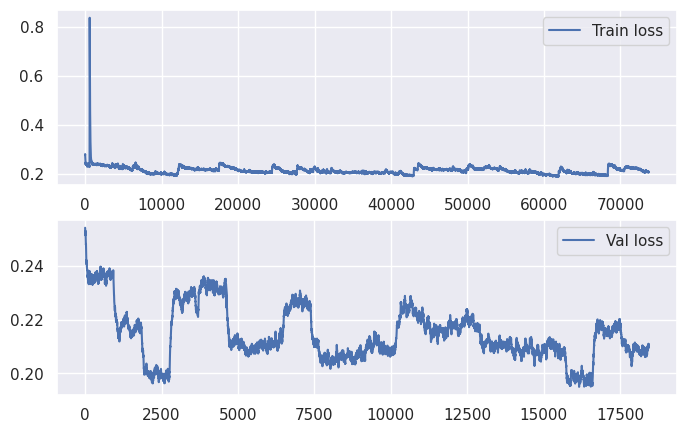

In [ ]:
import seaborn as sns
def ema(data, smoothing = 0.98):
    smoothed_data = []
    val = None
    for item in data:
        if val is None: val = item
        else: val = val * smoothing + item * (1 - smoothing)
        smoothed_data.append(val)
    return smoothed_data

fig, axes = plt.subplots(2, 1, figsize = (8, 5))
sns.lineplot(ema(train_history), ax = axes[0], label = "Train loss")
sns.lineplot(ema(test_history), ax = axes[1], label = "Val loss")

In [ ]:
# Add new column which holds sequence len
df_test = pd.read_csv("Datasets/test_sequences.csv")
sequence_len = df_test['sequence'].apply(lambda x: len(x))
df_test.insert (3, "sequence_len", sequence_len)
df_test.head()
df_test.shape


(1343823, 6)

In [ ]:
df_test_177 = df_test[df_test["sequence_len"] == 177]
print(df_test_177.shape)

(335823, 6)


Now that we've got a model, let's make predictions!

In [ ]:
df_test_177 = df_test_177.fillna(0)
mapping = {'G': [1, 0, 0, 0],
           'A': [0, 1, 0, 0],
           'U': [0, 0, 1, 0],
           'C': [0, 0, 0, 1]}
input_sequences = df_test_177["sequence"].apply(lambda x: t.Tensor([mapping[i] for i in x]).to(device))

In [ ]:
import csv
with open("output.csv", "a") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['id','reactivity_DMS_MaP','reactivity_2A3_MaP'])
    start_idx = 0
    for input_sequence in tqdm(input_sequences):
        # Forward pass
        with t.no_grad():
            output = model(input_sequence.unsqueeze(dim = 0))
            output_list = output.squeeze().cpu()
            writer.writerows([[start_idx + index, i.item(), i.item()] for index, i in enumerate(output_list)])
            start_idx += len(output_list)

100%|██████████| 335823/335823 [13:26<00:00, 416.47it/s]
